In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../Data/clean_food_data.csv')

In [160]:
data.head(30)

,market,latitude,longitude,commodity,unit,price,year,month
0,Arusha (urban),-3.366667,36.683333,Maize,100 KG,38464.29,2006,1
1,Arusha (urban),-3.366667,36.683333,Rice,100 KG,63227.27,2006,1
2,Arusha (urban),-3.366667,36.683333,Beans,100 KG,80714.29,2006,1
3,Arusha (urban),-3.366667,36.683333,Maize,100 KG,34833.33,2006,2
4,Arusha (urban),-3.366667,36.683333,Rice,100 KG,72727.27,2006,2
5,Arusha (urban),-3.366667,36.683333,Beans,100 KG,65083.33,2006,2
6,Arusha (urban),-3.366667,36.683333,Maize,100 KG,31000.00,2006,3
7,Arusha (urban),-3.366667,36.683333,Rice,100 KG,81961.54,2006,3
8,Arusha (urban),-3.366667,36.683333,Beans,100 KG,46875.00,2006,3
9,Arusha (urban),-3.366667,36.683333,Maize,100 KG,20545.45,2006,4


In [161]:
def handle_outliers(data, column):
    Q3 = data[column].quantile(.75)
    Q1 = data[column].quantile(.25)
    IQR = Q3 -Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound

In [162]:
beans_data = data[data['commodity'] == 'Beans']
lower, upper = handle_outliers(beans_data, 'price')
data.loc[((data['commodity'] == 'Beans') & (data['price'] < lower)), 'price'] = lower
data.loc[((data['commodity'] == 'Beans') & (data['price'] > upper)), 'price'] = upper

In [163]:
data['years_since_start'] = data['year'] - 2006

In [164]:
data.sort_values(by=['market', 'commodity', 'year'], inplace=True)

In [165]:
for month in range(2, 13):
    data[f'past_{month-1}_months_mean_price'] = data.groupby(['market', 'commodity'])['price'].rolling(window=month).mean().reset_index(level=[0, 1], drop=True).fillna(0)
    data[f'past_{month-1}_months_mean_price'] = np.log10(data[f'past_{month-1}_months_mean_price'] + 0)


In [166]:
for period in range(1, (max(data['year'])-2006) + 1):
    data[f'past_{period}_years_mean_price'] = data.groupby(['market', 'commodity'])['price'].rolling(window=13 * period).mean().reset_index(level=[0, 1], drop=True).fillna(0)
    data[f'past_{period}_years_mean_price'] = np.log10(data[f'past_{period}_years_mean_price'] + 0)

In [167]:
data['yearly_average_price'] = data.groupby(['market', 'commodity', 'year'])['price'].transform('mean')
data['monthly_average_price'] = data.groupby(['market', 'commodity', 'month'])['price'].transform('mean')
data['market_average_price'] = data.groupby(['market', 'commodity'])['price'].transform('mean')
data['commodity_yearly_average_price'] = data.groupby(['commodity', 'year'])['price'].transform('mean')
data['commodity_monthly_average_price'] = data.groupby(['commodity', 'month'])['price'].transform('mean')

In [168]:
data.replace(-float('inf'), 0, inplace=True)

In [169]:
le = LabelEncoder()
data['market'] = le.fit_transform(data['market'])

In [170]:
maize_data = data[data['commodity'] == 'Maize']
beans_data  = data[data['commodity'] == 'Beans']
rice_data  = data[data['commodity'] == 'Rice']

In [171]:
def remove_feature(df):
    column = ['latitude', 'longitude', 'unit', 'commodity']

    columns = list(df.columns)
    for col in column:
        columns.remove(col)
    
    df = df[columns]

    return df

In [172]:
maize_data = remove_feature(maize_data)
beans_data =remove_feature(beans_data)
rice_data = remove_feature(rice_data)

In [173]:
def plot_heatmap(df, name):
    plt.figure(figsize=(12, 8)) 
    correlation = df.corrwith(df['price'])
    sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm')
    plt.title(f"Correlation Heatmap of with " + name + " Price")
    plt.show()

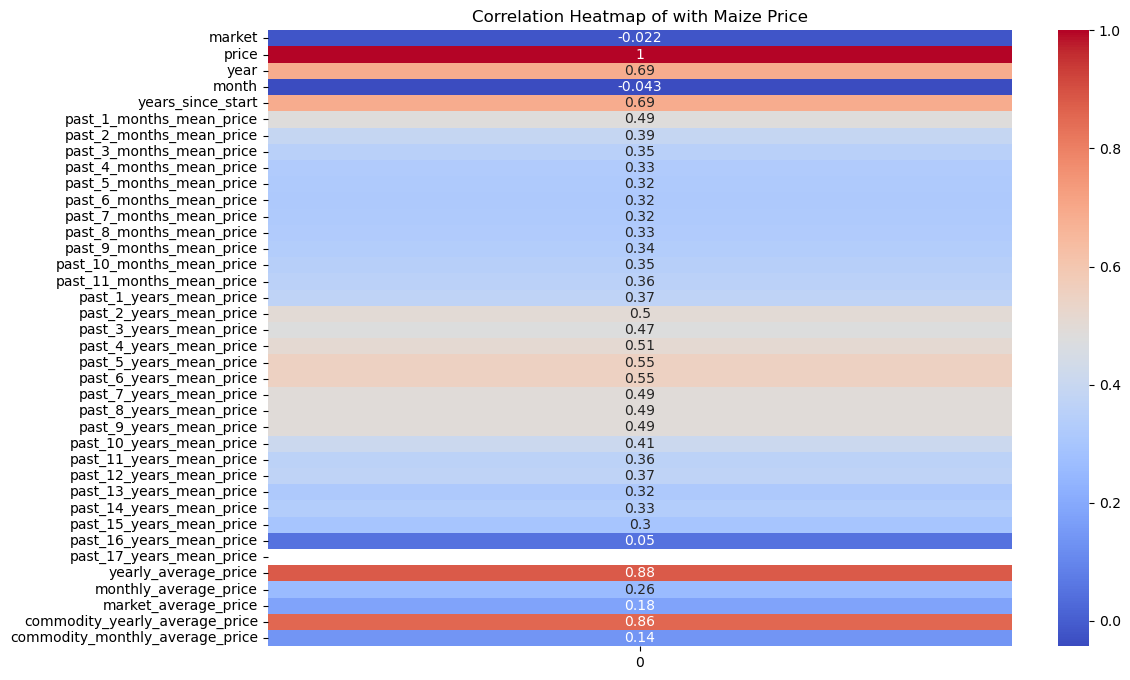

In [174]:
plot_heatmap(maize_data, 'Maize')

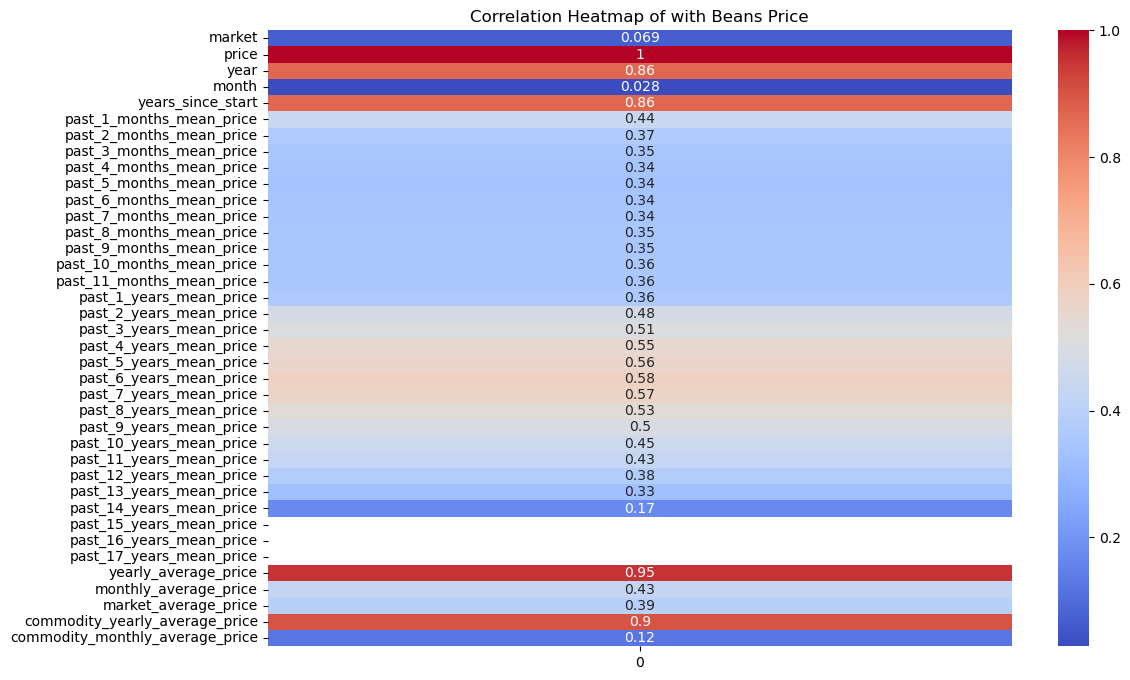

In [175]:
plot_heatmap(beans_data, 'Beans')

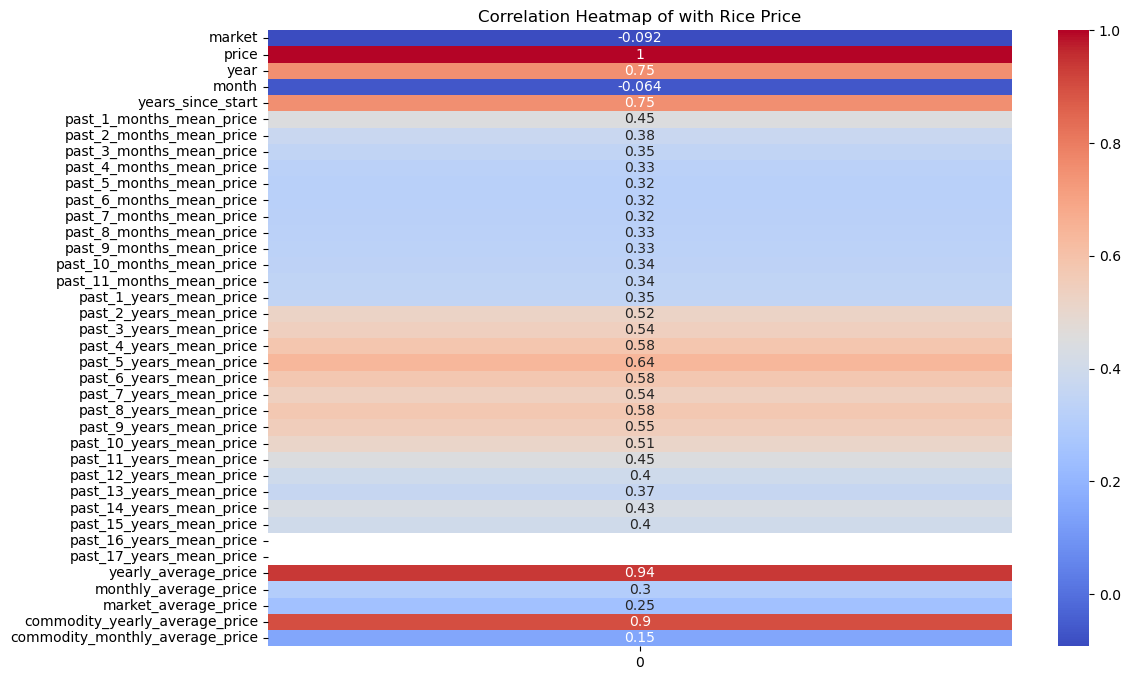

In [176]:
plot_heatmap(rice_data, 'Rice')

In [177]:
maize_data.to_csv('../Data/maize.csv', index=False)
beans_data.to_csv('../Data/beans.csv', index=False)
rice_data.to_csv('../Data/rice.csv', index=False)